In [1]:
%matplotlib inline
import pandas as pd
import os
from ydata_profiling import ProfileReport
from IPython import display
from PIL import Image
import requests
import matplotlib.pyplot as plt
import locale
import json
import numpy as np


pd.set_option('display.max_columns', 10)


In [2]:
def rename_files(directory: str):
    for filename in os.listdir(directory):
        old_path = os.path.join(directory, filename)
        file_split = old_path.split('.')
        new_file_name = f'{file_split[0]}_{directory}.{file_split[1]}.{file_split[2]}' if len(file_split) == 3 else f'{file_split[0]}_{directory}.{file_split[1]}'
        os.rename(old_path, new_file_name)

In [3]:
# for directory in ['austin', 'portland', 'chicago', 'nashville']:
#     rename_files(directory)

### Type of files

- listings.csv.gz: detailed listings data
- calendar.csv.gz: detailed calendar data
- reviews.csv.gz: detailed review data
- listings.csv: summary information and metrics for listing (good for visualization)
- reviews.csv: summary review data and listing id (to facilitate time based analytics and visualizations linked to a listing)
- neighbourhoods.csv: neighbourhood list for geo filter
- neighbourhoods.geojson: geojson file of neighbourhoods of the city

In [4]:
detailed_listings_austin_df = pd.read_csv('data/listings_austin.csv.gz')
detailed_calendar_austin_df = pd.read_csv('data/calendar_austin.csv.gz')
detailed_review_austin_df = pd.read_csv('data/reviews_austin.csv.gz')
summary_listings_austin_df = pd.read_csv('data/listings_austin.csv')
summary_reviews_austin_df = pd.read_csv('data/reviews_austin.csv')

In [5]:
print('Detailed listing austin df', detailed_listings_austin_df.shape)
print('Detailed calendar austin df', detailed_calendar_austin_df.shape)
print('Detailed review austin df', detailed_review_austin_df.shape)
print('Summary listing austin df', summary_listings_austin_df.shape)
print('Summary review austin df', summary_reviews_austin_df.shape)

Detailed listing austin df (13808, 75)
Detailed calendar austin df (5039567, 7)
Detailed review austin df (486924, 6)
Summary listing austin df (13808, 18)
Summary review austin df (486924, 2)


In [7]:
detailed_listings_austin_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
detailed_listings_austin_df.head()

id                          listing_url       scrape_id last_scraped  \
0  329306  https://www.airbnb.com/rooms/329306  20221215043825   2022-12-15   
1    5456    https://www.airbnb.com/rooms/5456  20221215043825   2022-12-15   
2  331549  https://www.airbnb.com/rooms/331549  20221215043825   2022-12-15   
3    5769    https://www.airbnb.com/rooms/5769  20221215043825   2022-12-15   
4  333442  https://www.airbnb.com/rooms/333442  20221215043825   2022-12-15   

            source  ... calculated_host_listings_count  \
0      city scrape  ...                              5   
1      city scrape  ...                              1   
2  previous scrape  ...                              1   
3      city scrape  ...                              1   
4      city scrape  ...                              1   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           1   
2                                           0   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            3   
1                                            0   
2                                            1   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                           0               4.36  
1                                           0               3.71  
2                                           0                NaN  
3                                           0               1.77  
4                                           0               1.32  

[5 rows x 75 columns]

In [5]:
detailed_review_austin_df.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments  
0  Sylvia is a hostess who is gracious and helpfu...  
1  Highly recommended. Sylvia was extremely helpf...  
2  A great place to stay in a great city. Sylvia ...  
3  Highly recommended! \r<br/>Cute and cozy guest...  
4  What a great little apartment!  It was clean, ...

In [11]:
top_10_listing = detailed_review_austin_df.groupby('listing_id').agg({'listing_id': 'count'}).rename(columns={'listing_id': 'count'}).sort_values(by='count', ascending=False).iloc[:10]
top_10_listing_ids = top_10_listing.index.tolist()

top_10_listing

count
listing_id       
949922       1086
1462311      1055
2528473       970
951272        969
57187         940
202187        923
4974255       918
12308357      812
705858        804
349447        798

Vintage Airstream in East Austin, Texas
https://a0.muscache.com/pictures/26475540/b4fd1d09_original.jpg
The Austin Texas House South Congress Stay and Enjoy
https://a0.muscache.com/pictures/monet/Select-1462311/original/2557b9e4-8cd6-46ad-a2f0-1147ec9a8ecc
Garden Cottage in East Austin
https://a0.muscache.com/pictures/33607821/a32a41ed_original.jpg
Downtown Austin Texas Condo
https://a0.muscache.com/pictures/c63ece37-f91e-45cb-a7e0-60c94d1e84d4.jpg
Zilker's Peaceful Haven-Fun, Funky, and Colorful
https://a0.muscache.com/pictures/4994fc87-b9fe-401f-ad9e-3f9b41f38631.jpg
South Congress Apartment
https://a0.muscache.com/pictures/3444698/c27c406f_original.jpg
Tiny House in the Heart of the East Side
https://a0.muscache.com/pictures/652acf98-8342-4bb4-9d9b-dfa11fce5127.jpg
Enjoy the Heated Pool at a Beautifully Designed Getaway
https://a0.muscache.com/pictures/monet/Select-12308357/original/bbc0ac2c-eb68-45db-aae9-3654d93ba46f
Walk to South Congress from Your Retreat with Heated Pool
https:

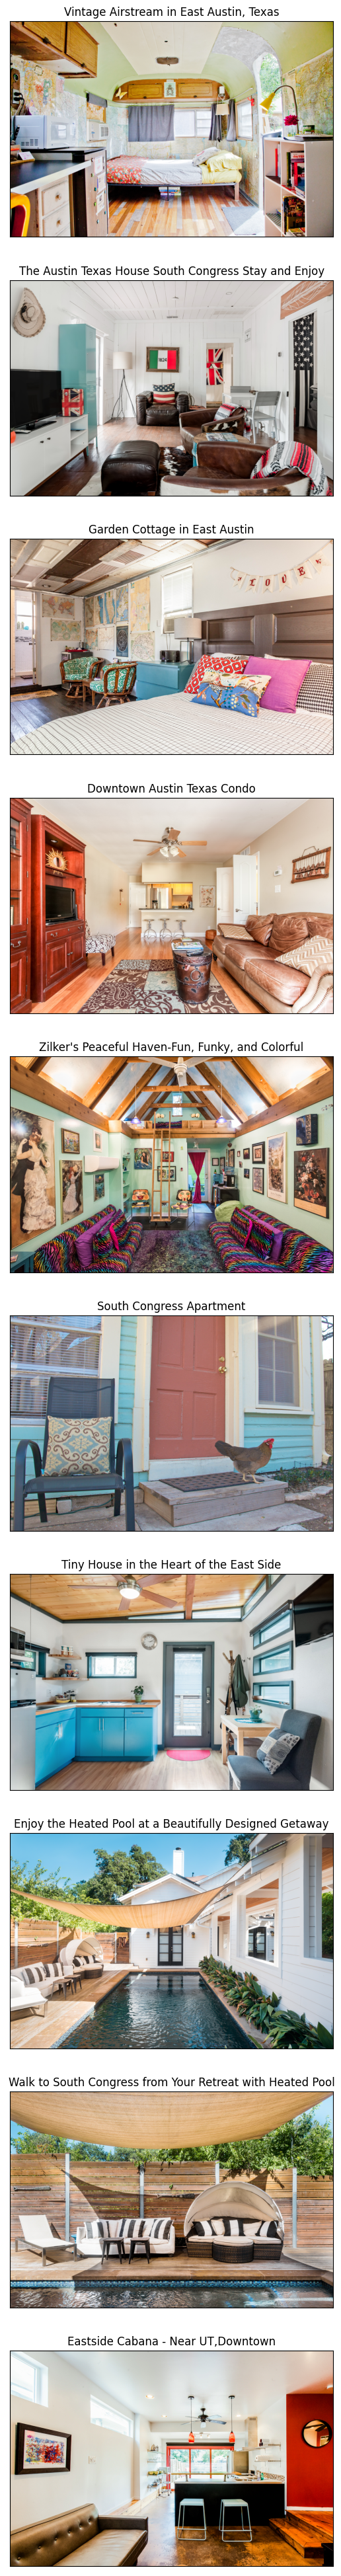

In [12]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 50))
for index, listing_id in enumerate(top_10_listing_ids):
    listing = detailed_listings_austin_df.loc[detailed_listings_austin_df['id'] == listing_id]
    listing_name = listing.name.item()
    listing_url = listing.picture_url.item()
    
    print(listing_name)
    print(listing_url)
    
    res = requests.get(listing_url, stream=True)
    img = Image.open(res.raw)
    axes[index].imshow(img)
    axes[index].set_xticks([])
    axes[index].set_yticks([])
    axes[index].set_title(f'{listing_name}')



In [13]:
top_listing_austin_id = top_10_listing_ids[0]
top_listing_austin = detailed_listings_austin_df.loc[detailed_listings_austin_df['id'] == top_listing_austin_id]

In [14]:
top_listing_austin

id                          listing_url       scrape_id last_scraped  \
216  949922  https://www.airbnb.com/rooms/949922  20221215043825   2022-12-15   

          source  ... calculated_host_listings_count  \
216  city scrape  ...                              2   

    calculated_host_listings_count_entire_homes  \
216                                           2   

    calculated_host_listings_count_private_rooms  \
216                                            0   

    calculated_host_listings_count_shared_rooms  reviews_per_month  
216                                           0                9.1  

[1 rows x 75 columns]

In [15]:
top_listing_austin.describe()

id     scrape_id    host_id  host_listings_count  \
count       1.0  1.000000e+00        1.0                  1.0   
mean   949922.0  2.022122e+13  5152543.0                  2.0   
std         NaN           NaN        NaN                  NaN   
min    949922.0  2.022122e+13  5152543.0                  2.0   
25%    949922.0  2.022122e+13  5152543.0                  2.0   
50%    949922.0  2.022122e+13  5152543.0                  2.0   
75%    949922.0  2.022122e+13  5152543.0                  2.0   
max    949922.0  2.022122e+13  5152543.0                  2.0   

       host_total_listings_count  ...  calculated_host_listings_count  \
count                        1.0  ...                             1.0   
mean                         3.0  ...                             2.0   
std                          NaN  ...                             NaN   
min                          3.0  ...                             2.0   
25%                          3.0  ...                             2.0   
50%                          3.0  ...                             2.0   
75%                          3.0  ...                             2.0   
max                          3.0  ...                             2.0   

       calculated_host_listings_count_entire_homes  \
count                                          1.0   
mean                                           2.0   
std                                            NaN   
min                                            2.0   
25%                                            2.0   
50%                                            2.0   
75%                                            2.0   
max                                            2.0   

       calculated_host_listings_count_private_rooms  \
count                                           1.0   
mean                                            0.0   
std                                             NaN   
min                                             0.0   
25%                                             0.0   
50%                                             0.0   
75%                                             0.0   
max                                             0.0   

       calculated_host_listings_count_shared_rooms  reviews_per_month  
count                                          1.0                1.0  
mean                                           0.0                9.1  
std                                            NaN                NaN  
min                                            0.0                9.1  
25%                                            0.0                9.1  
50%                                            0.0                9.1  
75%                                            0.0                9.1  
max                                            0.0                9.1  

[8 rows x 42 columns]

### Analyze host response rate + response time to their review_scores_rating
1. Get review_scores_rating >= 5 hosts & number_of_reviews >= 100
2. Get review_scores_rating <= 1 host & number_of_reviews >= 10

In [16]:
top_10 = detailed_listings_austin_df.loc[(detailed_listings_austin_df['review_scores_rating'] >= 5) & (detailed_listings_austin_df['number_of_reviews'] >= 100)].sort_values(by=['number_of_reviews', 'review_scores_rating'], ascending=False).iloc[:10]

In [17]:
bottom_10 = detailed_listings_austin_df.loc[(detailed_listings_austin_df['review_scores_rating'] <= 4) & (detailed_listings_austin_df['number_of_reviews'] >= 10)].sort_values(by='review_scores_rating').iloc[:10]

In [18]:
top_10.iloc[0].picture_url

'https://a0.muscache.com/pictures/64240612-a203-4836-9551-b176f0983252.jpg'

In [19]:
bottom_10.iloc[0].picture_url

'https://a0.muscache.com/pictures/prohost-api/Hosting-625283130581312902/original/29d0a7f1-7b7d-451f-8c1c-0b9c8525ac5f.jpeg'

In [20]:
top_10.number_of_reviews

3472    216
6080    214
2424    207
2591    188
2827    174
2336    165
4843    138
2351    126
1582    122
6376    122
Name: number_of_reviews, dtype: int64

In [21]:
bottom_10.number_of_reviews

10795    19
10791    24
749      10
9691     15
10606    24
11056    17
9323     12
7916     10
9077     16
7880     11
Name: number_of_reviews, dtype: int64

In [22]:
worst_listing_id = bottom_10.iloc[0].id
detailed_review_austin_df.loc[detailed_review_austin_df['listing_id'] == worst_listing_id]['comments'].tolist()

['Heads up! Make sure you READ your listing carefully! I had a unit with no working a/c in 98 + weather. No working hot water! Moved  to 3 different units in this apartment complex. All for a one night stay!!!',
 'OMG, when i stumbled upon this studio on AirBnB, it seemed almost too good to be true. There must be a catch! But everything was as perfect as it seemed online. Sean is a gracious host, when I needed help he was very helpful and he communicate very quickly. <br/><br/>The studio is just perfect! Kitchen is compact and contains everything one needs. Would absolutely recommend to stay there it is truly a hidden gem!',
 'Place is nicely decorated, apartment is in a gated community and all instructions for check-in are accurate and easy to follow. Sadly this is not a 5 star listing due to the following. The area is not the nicest in town, but it doesn’t feel unsafe at least during the time we were there. Other issues we had were the cleanliness of the place. Floor was not swept an

In [23]:
detailed_review_austin_df.loc[detailed_review_austin_df['listing_id'] == worst_listing_id]['comments']

473536    Heads up! Make sure you READ your listing care...
473537    OMG, when i stumbled upon this studio on AirBn...
473538    Place is nicely decorated, apartment is in a g...
473539            it's a good place, but a little bit noise
473540    Great place to stay in Austin. Clean, equipped...
473541    Sean was very responsive if we had a question....
473542    Make sure it is alll clean and stocked up had ...
473543    This is a very mixed review.<br/>The apartment...
473544    This apartment was a good value. The full size...
473545       Very accommodating and nice / clean apartment.
473546    Beautiful room, but things aren’t as they are ...
473547    The airbnb was very dirty, with many days with...
473548    Quiet area, close to Dt atx, and good location...
473549                                                    L
473550    Perfect spot! Perfect location! Perfect price!...
473551    Do not stay here. Upon arrival (we checked in ...
473552    Loved this place! It is exactl

In [24]:
print('Min date:', detailed_calendar_austin_df['date'].min())
print('Max date:', detailed_calendar_austin_df['date'].max())

Min date: 2022-12-15
Max date: 2023-12-28


In [25]:
locale.setlocale(locale.LC_ALL, '')

def currency_to_num(currency):
    return locale.atof(currency.strip('$'))

In [26]:
detailed_calendar_austin_df = detailed_calendar_austin_df.dropna()

In [27]:
detailed_calendar_austin_df['price_num'] = detailed_calendar_austin_df['price'].apply(currency_to_num)

In [30]:
detailed_calendar_austin_df

listing_id        date available    price adjusted_price  \
0              5456  2022-12-15         t   $95.00         $95.00   
1              5456  2022-12-16         t  $115.00        $115.00   
2              5456  2022-12-17         t  $115.00        $115.00   
3              5456  2022-12-18         t   $95.00         $95.00   
4              5456  2022-12-19         t   $85.00         $85.00   
...             ...         ...       ...      ...            ...   
5039562      325889  2023-12-10         t  $999.00        $999.00   
5039563      325889  2023-12-11         t  $999.00        $999.00   
5039564      325889  2023-12-12         t  $999.00        $999.00   
5039565      325889  2023-12-13         t  $999.00        $999.00   
5039566      325889  2023-12-14         t  $999.00        $999.00   

         minimum_nights  maximum_nights  price_num  
0                   2.0            90.0       95.0  
1                   2.0            90.0      115.0  
2                   2.0            90.0      115.0  
3                   2.0            90.0       95.0  
4                   2.0            90.0       85.0  
...                 ...             ...        ...  
5039562             3.0          1125.0      999.0  
5039563             3.0          1125.0      999.0  
5039564             3.0          1125.0      999.0  
5039565             3.0          1125.0      999.0  
5039566             3.0          1125.0      999.0  

[5039173 rows x 8 columns]

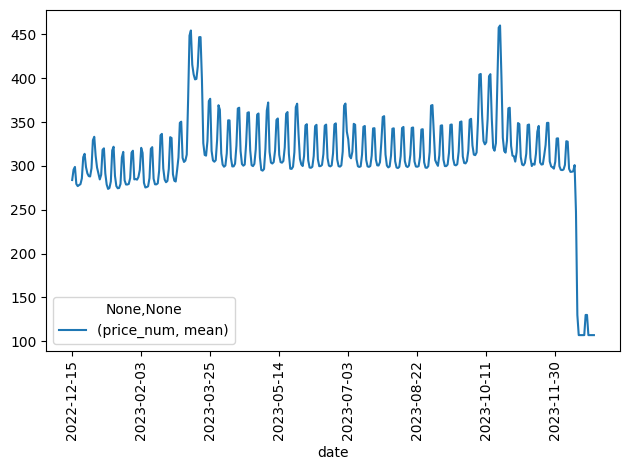

In [31]:
mean_calendar_date = detailed_calendar_austin_df.groupby('date').agg({'price_num': ['mean']})
mean_calendar_date = mean_calendar_date.sort_values(by='date')

mean_calendar_date.plot()
plt.xticks(rotation=90)
plt.tight_layout()


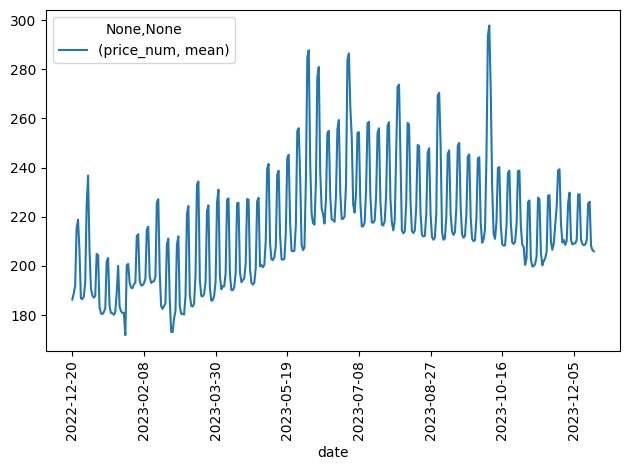

In [32]:
detailed_calendar_chicago_df = pd.read_csv('data/calendar_chicago.csv.gz')
detailed_calendar_chicago_df = detailed_calendar_chicago_df.dropna()
detailed_calendar_chicago_df['price_num'] = detailed_calendar_chicago_df['price'].apply(currency_to_num)

mean_calendar_date = detailed_calendar_chicago_df.groupby('date').agg({'price_num': ['mean']})
mean_calendar_date = mean_calendar_date.sort_values(by='date')

mean_calendar_date.plot()
plt.xticks(rotation=90)
plt.tight_layout()

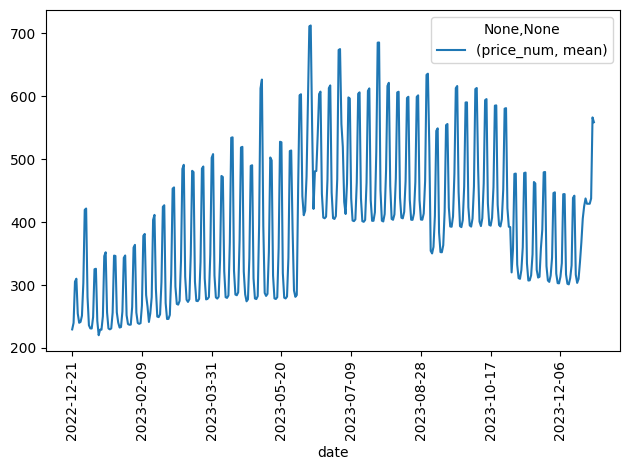

In [33]:
detailed_calendar_nashville_df = pd.read_csv('data/calendar_nashville.csv.gz')
detailed_calendar_nashville_df = detailed_calendar_nashville_df.dropna()
detailed_calendar_nashville_df['price_num'] = detailed_calendar_nashville_df['price'].apply(currency_to_num)

mean_calendar_date = detailed_calendar_nashville_df.groupby('date').agg({'price_num': ['mean']})
mean_calendar_date = mean_calendar_date.sort_values(by='date')

mean_calendar_date.plot()
plt.xticks(rotation=90)
plt.tight_layout()

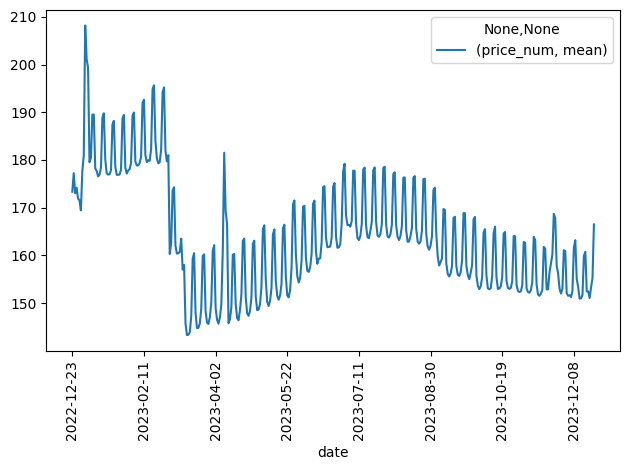

In [34]:
detailed_calendar_portland_df = pd.read_csv('data/calendar_portland.csv.gz')
detailed_calendar_portland_df = detailed_calendar_portland_df.dropna()
detailed_calendar_portland_df['price_num'] = detailed_calendar_portland_df['price'].apply(currency_to_num)

mean_calendar_date = detailed_calendar_portland_df.groupby('date').agg({'price_num': ['mean']})
mean_calendar_date = mean_calendar_date.sort_values(by='date')

mean_calendar_date.plot()
plt.xticks(rotation=90)
plt.tight_layout()

#### Price distribution of Austin

In [35]:
locale.setlocale(locale.LC_ALL, '')

def currency_to_num(currency):
    return locale.atof(currency.strip('$'))

detailed_listings_austin_df['price_num'] = detailed_listings_austin_df['price'].apply(currency_to_num)


In [36]:
detailed_listings_austin_df.price_num.value_counts(bins = np.arange(1, 1000, 100))

(0.999, 101.0]    4616
(101.0, 201.0]    4576
(201.0, 301.0]    1889
(301.0, 401.0]     915
(401.0, 501.0]     482
(501.0, 601.0]     303
(601.0, 701.0]     205
(701.0, 801.0]     168
(801.0, 901.0]     113
Name: price_num, dtype: int64

Text(0.5, 1.0, "Austin's listings price distribution")

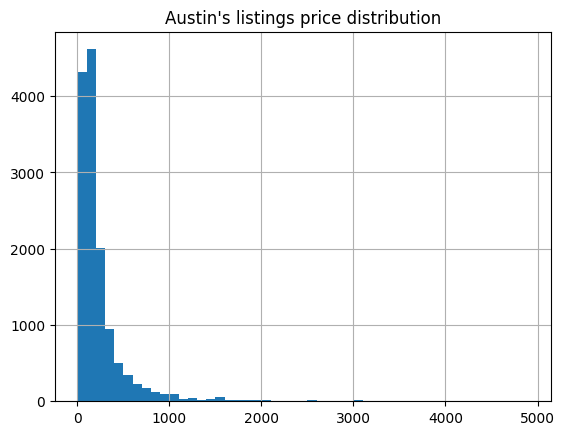

In [37]:
detailed_listings_austin_df.price_num.hist(bins=np.arange(0, 5000, 100))
plt.title("Austin's listings price distribution")


Text(0.5, 1.0, "Austin's listing price distribution 0 - 300")

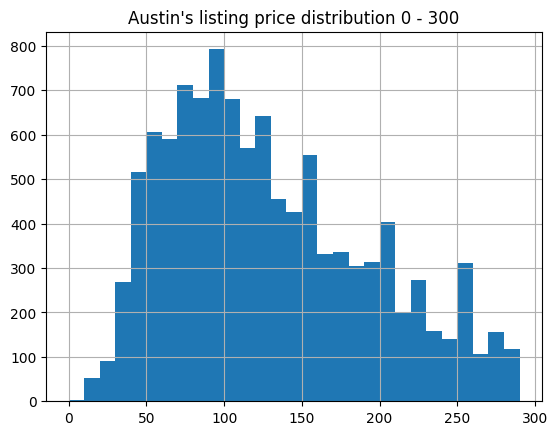

In [38]:
detailed_listings_austin_df.price_num.hist(bins=np.arange(0,300, 10))
plt.title("Austin's listing price distribution 0 - 300")

#### Price vs Amenities distribution

In [39]:
detailed_listings_austin_df.head()

id                          listing_url       scrape_id last_scraped  \
0  329306  https://www.airbnb.com/rooms/329306  20221215043825   2022-12-15   
1    5456    https://www.airbnb.com/rooms/5456  20221215043825   2022-12-15   
2  331549  https://www.airbnb.com/rooms/331549  20221215043825   2022-12-15   
3    5769    https://www.airbnb.com/rooms/5769  20221215043825   2022-12-15   
4  333442  https://www.airbnb.com/rooms/333442  20221215043825   2022-12-15   

            source  ... calculated_host_listings_count_entire_homes  \
0      city scrape  ...                                           2   
1      city scrape  ...                                           1   
2  previous scrape  ...                                           0   
3      city scrape  ...                                           0   
4      city scrape  ...                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            3   
1                                            0   
2                                            1   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  price_num  
0                                           0              4.36       63.0  
1                                           0              3.71       96.0  
2                                           0               NaN      100.0  
3                                           0              1.77       41.0  
4                                           0              1.32      286.0  

[5 rows x 76 columns]

In [40]:
austin_amenities_list = detailed_listings_austin_df.amenities.tolist()

In [41]:
individual_amenities = []

for amenities in austin_amenities_list:
    amenities = json.loads(amenities)
    individual_amenities += amenities
            
    

In [42]:
from collections import Counter

In [43]:
individual_amenities_counter = Counter(individual_amenities)

In [44]:
individual_amenities_counter.most_common(20)

[('Smoke alarm', 13039),
 ('Kitchen', 12717),
 ('Wifi', 12246),
 ('Essentials', 11675),
 ('Long term stays allowed', 11417),
 ('Free parking on premises', 10696),
 ('Carbon monoxide alarm', 10297),
 ('Hair dryer', 10199),
 ('Hangers', 9916),
 ('Fire extinguisher', 9866),
 ('Iron', 9858),
 ('Heating', 9598),
 ('Shampoo', 9493),
 ('Air conditioning', 9237),
 ('Hot water', 9192),
 ('Dishes and silverware', 8909),
 ('Refrigerator', 8717),
 ('Cooking basics', 8636),
 ('Self check-in', 8366),
 ('Microwave', 8323)]

In [45]:
individual_amenities_counter.most_common()[-20:]

[('Smeg stainless steel electric stove', 1),
 ('KitchenAid side-by-side counter depth 36" refrigerator', 1),
 ('40" HDTV with Amazon Prime Video, Apple TV, Hulu, Netflix', 1),
 ('Shared outdoor pool - available all year, infinity', 1),
 ('55" HDTV with Hulu, HBO Max, Apple TV, Amazon Prime Video, Netflix, standard cable',
  1),
 ('Fast wifi – 237 Mbps', 1),
 ('Brand name shampoo', 1),
 ('Brand name conditioner', 1),
 ('Double door refrigerator', 1),
 ('TV with Apple TV, Hulu, Amazon Prime Video, Netflix, Disney+', 1),
 ('65" HDTV with Amazon Prime Video, Apple TV', 1),
 ('64" HDTV with Amazon Prime Video, HBO Max, Netflix, Roku', 1),
 ('70" HDTV with Chromecast, Netflix', 1),
 ('Newly Purchased refrigerator', 1),
 ('Newly Purchased stainless steel gas stove', 1),
 ('48" HDTV with Amazon Prime Video, Disney+, Hulu', 1),
 ('Clothing storage: walk-in closet, dresser, wardrobe, and closet', 1),
 ('34" HDTV with Roku', 1),
 ('40" HDTV with HBO Max, Amazon Prime Video', 1),
 ('50" HDTV with 

#### Room type vs price

In [46]:
detailed_listings_austin_df['price_num'] = detailed_listings_austin_df['price'].apply(currency_to_num)

Text(0.5, 1.0, 'Average price vs room type')

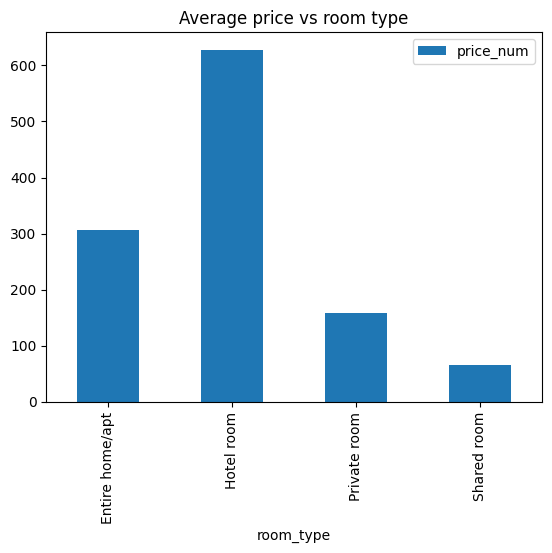

In [47]:
detailed_listings_austin_df.groupby('room_type').agg({'price_num': 'mean'}).plot.bar()
plt.title("Average price vs room type")

<AxesSubplot: xlabel='room_type'>

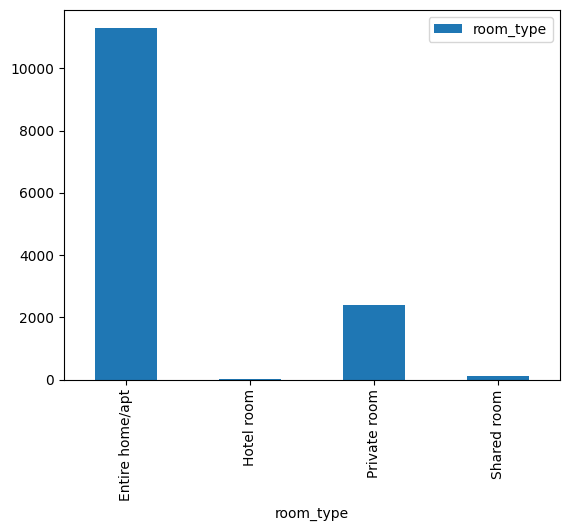

In [48]:
detailed_listings_austin_df.groupby('room_type').agg({'room_type': 'count'}).plot.bar()


Text(0.5, 1.0, "Entire home/apt's listing price range")

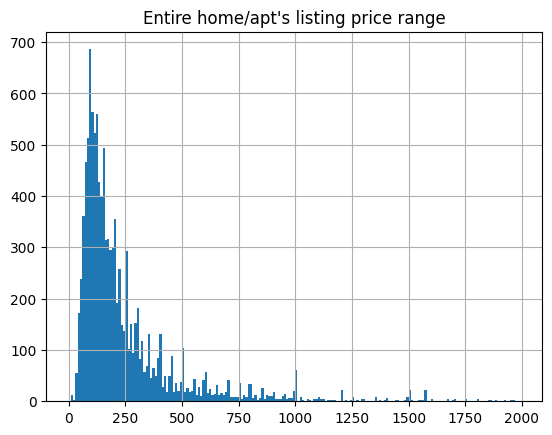

In [49]:
detailed_listings_austin_df.loc[detailed_listings_austin_df['room_type'] == 'Entire home/apt'].price_num.hist(bins=np.arange(0,2000, 10))
plt.title('Entire home/apt\'s listing price range')

In [50]:
detailed_listings_austin_df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3           Private room
4        Entire home/apt
              ...       
13803    Entire home/apt
13804       Private room
13805       Private room
13806    Entire home/apt
13807    Entire home/apt
Name: room_type, Length: 13808, dtype: object

<AxesSubplot: xlabel='property_type'>

<Figure size 2000x8000 with 0 Axes>

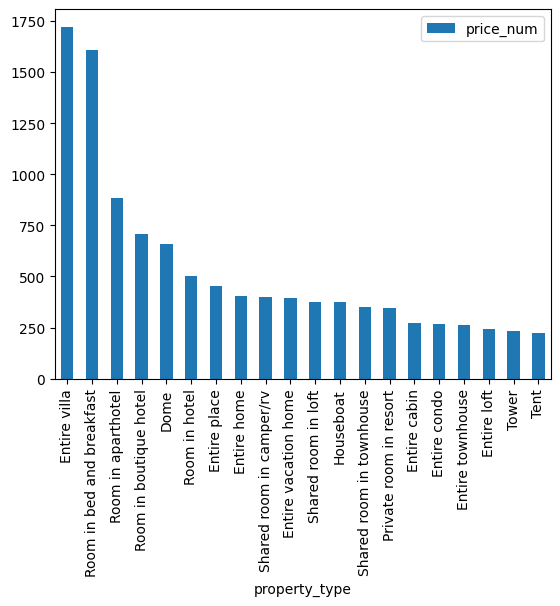

In [53]:
plt.figure(figsize=(20, 80))
detailed_listings_austin_df.groupby('property_type').agg({'price_num': 'mean'}).sort_values(by='price_num', ascending=False).iloc[:20].plot.bar()

#### Areas with high concentration listing

In [54]:
detailed_listings_austin_df.groupby('neighbourhood').agg({'neighbourhood': 'count'})

neighbourhood
neighbourhood                                              
Austin , Texas, United States                             1
Austin Texas, United States                               1
Austin, Texas, United States                           8268
Austin, Tx, United States                                 1
Austin, United States                                     2
Bee Cave, Texas, United States                            4
Bouldin, Austin, Texas, United States                     1
Cedar Park, Texas, United States                          1
Clarksville, Texas, United States                         1
Del Valle, Texas, United States                           2
Dripping Springs, Texas, United States                    5
Lake Travis, Texas, United States                         1
Lakeway, Texas, United States                            44
Manchaca, Texas, United States                            1
Pflugerville, Texas, United States                        1
Rollingwood, Texas, United States                         1
Round Rock, Texas, United States                          2
Sunset Valley, Texas, United States                      10
The Hills, Texas, United States                           4
West Lake Hills, Texas, United States                    19
Westlake Hills, Austin, Texas, United States              1

- Price goes up due to event

In [55]:
detailed_listings_austin_df.loc[detailed_listings_austin_df['price_num'] == 0]

id                            listing_url       scrape_id  \
6164  42738847  https://www.airbnb.com/rooms/42738847  20221215043825   
6581  45895289  https://www.airbnb.com/rooms/45895289  20221215043825   

     last_scraped       source  ...  \
6164   2022-12-15  city scrape  ...   
6581   2022-12-15  city scrape  ...   

     calculated_host_listings_count_entire_homes  \
6164                                           0   
6581                                           0   

     calculated_host_listings_count_private_rooms  \
6164                                            0   
6581                                            0   

     calculated_host_listings_count_shared_rooms reviews_per_month  price_num  
6164                                           0               NaN        0.0  
6581                                           0               NaN        0.0  

[2 rows x 76 columns]

In [56]:
detailed_review_austin_df

listing_id                  id        date  reviewer_id  \
0                     5456                 865  2009-03-08         5267   
1                     5456                 977  2009-03-19         8102   
2                     5456                1039  2009-03-22         8241   
3                     5456                1347  2009-04-08        11152   
4                     5456                1491  2009-04-13        12400   
...                    ...                 ...         ...          ...   
486919  765335489662739045  769658235586859378  2022-11-27    209716322   
486920  774123767710030618  778286680039359620  2022-12-09     56534198   
486921  774123767710030618  780460079914360557  2022-12-12     53066740   
486922  774634812766561454  779027301943012817  2022-12-10     64336862   
486923  775358125921423628  779002882873914095  2022-12-10     18830733   

       reviewer_name                                           comments  
0              Ellen  Sylvia is a hostess who is gracious and helpfu...  
1               Phil  Highly recommended. Sylvia was extremely helpf...  
2              Galen  A great place to stay in a great city. Sylvia ...  
3              April  Highly recommended! \r<br/>Cute and cozy guest...  
4             Ivonne  What a great little apartment!  It was clean, ...  
...              ...                                                ...  
486919        Darren  We were the first to stay at this wonderful sp...  
486920         Jesse  Clean house and great location.<br/>Grocery st...  
486921          Smit  It's a great place overall. communication and ...  
486922       Melissa  Lizs casita was so awesome! It was plenty of r...  
486923          Phil  wonderful stay! oleg is a sweet gentleman and ...  

[486924 rows x 6 columns]